In [79]:
import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

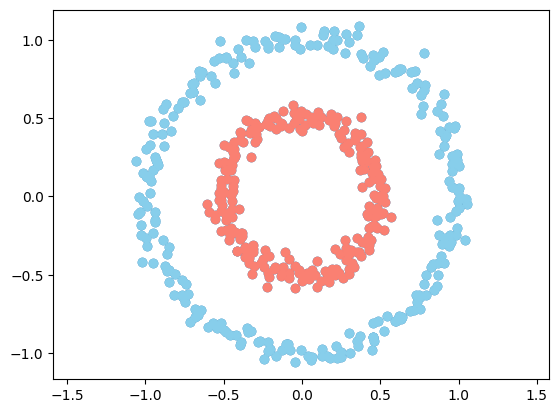

In [80]:
#Generamos un conjunto de datos
n= 500
p = 2

X, Y = make_circles(n_samples=n, factor =0.5, noise = 0.05)
Y = Y[:, np.newaxis]
plt.scatter(X[:,0], X[:,1])
#print (Y)

plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c="skyblue")
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c="salmon")
plt.axis("equal")
plt.show()

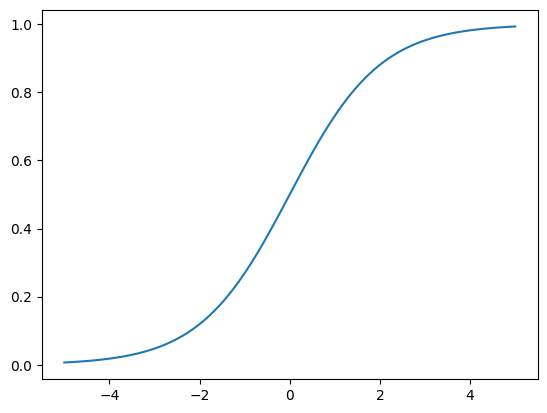

In [81]:
# Definicion capa neuronal

class neural_layer():
    def __init__(self, n_conn, n_neur, act_func):
        self.act_func = act_func
        self.b = np.random.rand(1, n_neur)* 2 - 1
        self.w = np.random.rand(n_conn, n_neur)* 2 - 1

sigm = (lambda x:1 / (1 + np.e ** -x), lambda x : x * (1-x))
relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))
plt.show()


In [82]:
from re import L
#Crear las capas neuronales
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)


In [83]:
# Función para crear la red neuronal
def create_nn(topology, act_func):
    nn= []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l],topology[l+1], act_func))
    return nn
topology = [2, 4, 8, 16, 8, 4, 1]
create_nn(topology, sigm)

#redefinicion de topologia (final)
topology = [p, 4, 8, 1]
neural_net = create_nn(topology,sigm)

#definir la funcion de costo
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)** 2), lambda Yp, Yr : (Yp -Yr))

#Funcion de entrenamiento
def train(neural_net, X, Y, l2_cost, learning_rate=0.5, train=True):
    #Forward propagation (propagación hacia delante )
    out = [(None, X)]
    for l, layer in enumerate(neural_net):
        z = out [-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_func[0](z)
        out.append((z, a))

#Backward Pass (retropropagacion)
    if train:
        deltas = []

        for l in reversed(range(0, len(neural_net))):
            z = out[l + 1][0]
            a = out[l + 1][1]

            if l == len(neural_net) -1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_func[1](a))
            else:
                deltas.insert(0, deltas[0] @ neural_net[l + 1].w.T * neural_net[l].act_func[1](a))

            _w = neural_net[l].w

            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate
            neural_net[l].w = neural_net[l].w -out[l][1].T @ deltas[0] * learning_rate

    return out[-1][1]
        
    


In [84]:
# prueba de entrenamiento 
train(neural_net, X, Y, l2_cost, 0.5)
print('')

In [90]:
#Entrenamiento y visualización

import time
from IPython.display import clear_output

neural_net = create_nn(topology, sigm)
loss = []

for i in range(10000):
    pY = train(neural_net, X, Y, l2_cost, learning_rate = 0.03)

    if i % 25 == 0:
        loss.append(l2_cost[0](pY, Y))

        res = 50 
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for il, x1 in enumerate(_x1):
                _Y[i0, il] = train(neural_net, np.array([[x0, x1]]), Y, l2_cost, train=False) 

        plt.pcolormesh(_x0, _x1, _Y, cmap= "coolwarm")  
        plt.axis("equal")
        plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c="skyblue")
        plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c="salmon")

        clear_output(wait =True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)

KeyboardInterrupt: 